<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> 

<h2 align="center">Simple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Task 2: Loading the Data and Importing Libraries
---

In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
# ensure that plots and graphs generated are jupiter notebook friendly

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [2]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#check instances
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Task 3: Remove the index column

In [4]:
#drop index column
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
advert.drop(['Unnamed: 0'], axis=1, inplace = True)
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Task 4: Exploratory Data Analysis

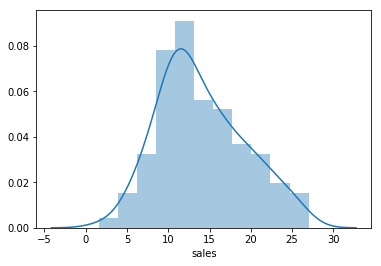

In [6]:
# Checking the data through visualization helps decide key steps 
import seaborn as sns
sns.distplot(advert.sales)

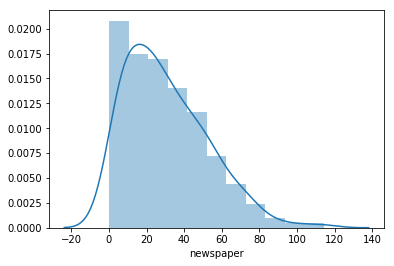

In [7]:
#looks like sales are a normal distribution, check other columns
sns.distplot(advert.newspaper)
#the spend on newspaper seems to be skewed to the right, most of the spends on newspaper are fairly low.

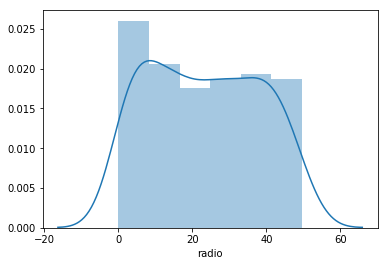

In [8]:
sns.distplot(advert.radio)
# the spend on radio is a uniform distribution

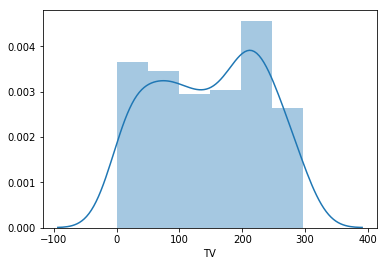

In [9]:
sns.distplot(advert.TV)
# the TV predictor seems to be the highest spend, in a uniform distribution.

### Task 5: Exploring Relationships between Predictors and Response

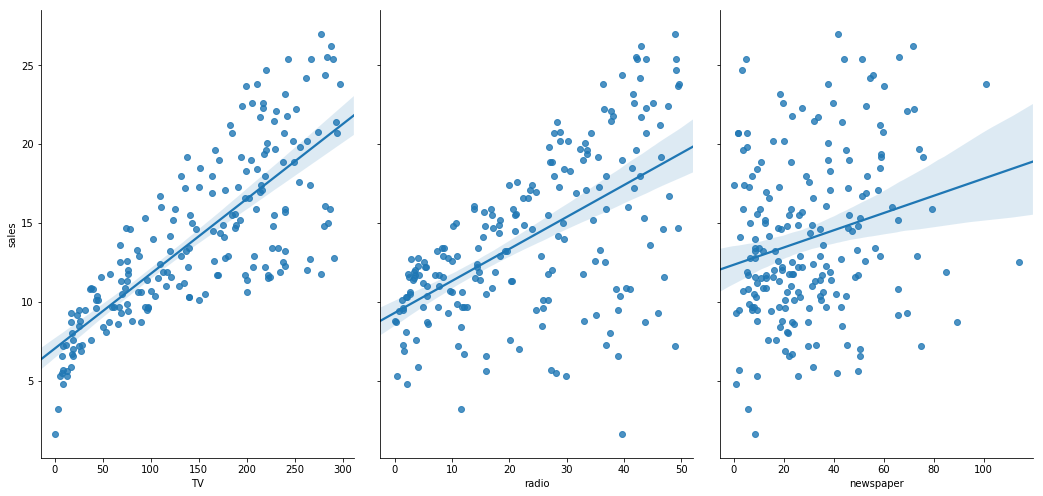

In [10]:
# Visualize the relationship between the features and response using scatterplots.
# check each feature/predictor( radio, newspaper, tv) and how it affects the response variable(sales)
#how to decide which of the 3 features is the most correlated/predictive to sales revenue?
sns.pairplot(advert, x_vars=['TV','radio','newspaper'],y_vars='sales', height=7, aspect=0.7, kind='reg')

In [11]:
# we have the sales revene on the y axis, with a single predictor on the x axis for each of the iindividual plots
#the sales and spend on newspaper is not highly correlated, whereas the sales and spend for TV advertising is highly correlated
# weak relationship between sales and spend for radio
advert.TV.corr(advert.sales)

0.7822244248616061

In [12]:
#check all other correlations
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


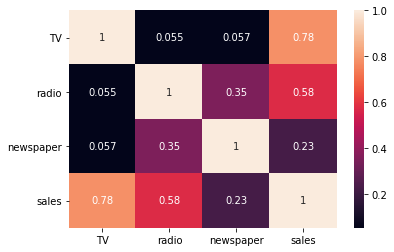

In [13]:
#illustrate the correlation matrix with a heatmap
sns.heatmap(advert.corr(), annot=True)

### Task 6: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [18]:
# prepare features using pandas
X= advert [['TV']]
X.head()


,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [20]:
#check data type and shape
print(type(X))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [21]:
#check if the target variable is a pandas series. Necessary data type to fit a scikit learn linear regression model
y = advert.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [22]:
# Create training and test splits ( can use defaults or set a test size)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
#check raio of the split, can do it through shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [25]:
# import linear regression estimator
#fit empty estimator to our training data
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Task 7: Interpreting Model Coefficients

In [27]:
# take a look at the intercepts and coeffiecients values
print(linreg.intercept_)
print(linreg.coef_)

6.91197261886872
[0.04802945]


In [28]:
# 6.91197261886872 is our B0 in our linear model
# 0.04802945 is B1, coeff associated to spending on TV ads. For a given ammount of radio and newspaper ad spending, a unit increase of TV ad spending is associated to 0.04802945 unit increase in the sales revenue.OR = For a given ammount of newspaper and radio ad spending, an additional 1000 $ spend on TV ads is associated with an increase in sales of 48.02 items. 

### Task 8: Making Predictions with our Model

In [32]:
# make predictions on the test set ( of 25%)
y_pred = linreg.predict(X_test)

# we created a list of predictions that are stored in y_pred
y_pred[:5]
# these are the first 5 values predicted on the test set.
# how do we know if these values are accurate? 
# Use an evaluation metric

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

### Task 9: Model Evaluation Metrics

In [35]:
# we need an evaluation metric designed for regression problems, for continuous values, such as Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.
# define true and predicted response values, as an example * absolute values always positive
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]



**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [37]:
print((10 + 0 + 20 + 10) / 4)

from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))
# in both cases, manual and function, the result is the same.

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [40]:
# check mean squared error
# instead of taking the difference of the absolute values, we square the difference of the errors
#first calculate the MSE by hand

print((10**2 + 0**2 + 20**2 + 10**2) /4)
# next use sklearn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [43]:
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2) /4))

print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [44]:
# The MAE is the easiest to understand, although the MSE is more popular because the MSE punishes the larger errors by the squared operation **2
# The RMSE is interpretable in the y units. Its easier to put into context in the same units as the reponse variable
# Compute RMSE for the sales prediction

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.210929707703542


In [45]:
# RMSE = 3.210929707703542